I will need the scripts as well as the model itself. Can you explain the steps using "#" while writing the script and creating the model? What parameters you used why you used and what the outcome tells us? How can we improve the model? If you could provide those explanations and your insights I would be very grateful. Thanks!

## we will only use "stool" for sample_location column.

I have obtained 16S rRNA sequence data from stool samples of patients, along with abundance values for different bacteria species and corresponding metadata such as sample ID, gender, and disease status (Crohn's disease or not). The abundance values and metadata are stored in separate files. The abundance values are numerical, and there may be missing values in the dataset.



I need your expertise to develop a diagnosis model for Crohn's disease using a random forest machine learning approach in Python. The model should utilize the abundance values of bacteria as features and consider the metadata variables (sample ID, gender, and disease status) as additional inputs.

In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [84]:
df = pd.read_excel('metadata.xlsx' )
df.head()

,sample,subject,AB_exposure,Diagnosis,PCDAI,race,sample_location,Erysipelotrichaceae,Neisseriaceae,Clostridiales,Pasteurellaceae,Bifidobacteriaceae,Fusobacteriaceae,Veillonellaceae,Enterobacteriaceae,Micrococcaceae,Verrucomicrobiaceae,Gemellaceae,Coriobacteriaceae,Bacteroidales
0,01-001.S,M1-0001,NoAB,CD,35.0,caucasian,stool,0.007525,0.000719,0.452681,0.016488,0.000518,0.001240,0.019947,0.008132,0.000056,0.000030,0.000097,0.001132,0.462303
1,01-005.S,M1-0002,YesAB,CD,27.5,african,stool,0.019892,0.000000,0.738201,0.004638,0.000015,0.000020,0.055190,0.001412,0.000070,0.000025,0.000136,0.001115,0.221703
2,01-006.S,M1-0003,NoAB,CD,25.0,african,stool,0.034836,0.001584,0.228197,0.174006,0.002362,0.026368,0.106653,0.183021,0.000720,0.000029,0.078024,0.006034,0.195925
3,04-102.S,M1-0892,NoAB,CD,57.5,other,stool,0.012066,0.000000,0.956640,0.000022,0.000022,0.000022,0.052672,0.008087,0.000043,0.001721,0.000129,0.000774,0.012345
4,SKSTL0001,M1-0873,NoAB,CD,35.0,caucasian,stool,0.051680,0.000000,0.469825,0.027256,0.058034,0.031984,0.090631,0.039372,0.000057,0.000000,0.000134,0.001857,0.259833


Let's filter the data on  "stool" for sample_location column.

In [85]:
df = df.loc[df['sample_location']=='stool']

In [86]:
df.shape

(255, 20)

In [87]:
df.describe()

,PCDAI,Erysipelotrichaceae,Neisseriaceae,Clostridiales,Pasteurellaceae,Bifidobacteriaceae,Fusobacteriaceae,Veillonellaceae,Enterobacteriaceae,Micrococcaceae,Verrucomicrobiaceae,Gemellaceae,Coriobacteriaceae,Bacteroidales
count,219.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000
mean,31.997717,0.037495,0.000498,0.520968,0.019830,0.048553,0.009134,0.045818,0.055448,0.000144,0.007064,0.002074,0.013222,0.159825
std,15.149446,0.039019,0.002571,0.254155,0.064874,0.071636,0.037611,0.065884,0.121437,0.000651,0.028973,0.008295,0.019125,0.170116
min,0.000000,0.000000,0.000000,0.000354,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000082
25%,22.500000,0.010344,0.000000,0.393322,0.000049,0.000840,0.000000,0.003378,0.000646,0.000000,0.000000,0.000085,0.001385,0.013059
50%,32.500000,0.026253,0.000000,0.565764,0.000596,0.016891,0.000061,0.021672,0.007666,0.000012,0.000013,0.000251,0.005724,0.094019
75%,42.500000,0.052319,0.000064,0.710686,0.007558,0.063670,0.000643,0.057288,0.045033,0.000070,0.000100,0.000854,0.017074,0.283993
max,70.000000,0.249037,0.025667,0.965537,0.571583,0.395197,0.282495,0.554356,0.976884,0.008476,0.250594,0.078024,0.116350,0.660427


In [88]:
# Let's take a look and visualize the percentage of nan values, unique values and the type of our features
from tabulate import tabulate
stats = []
for col in df.columns:
    stats.append((col, df[col].nunique(), df[col].isnull().sum() * 100 / df.shape[0], df[col].dtype))
    stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique_values', '% MissingValues', 'type'])
    df_ = stats_df.sort_values('% MissingValues', ascending=False)
print(tabulate(df_, headers = 'keys', tablefmt = 'psql'))

+----+---------------------+-----------------+-------------------+---------+
|    | Feature             |   Unique_values |   % MissingValues | type    |
|----+---------------------+-----------------+-------------------+---------|
|  4 | PCDAI               |              27 |           14.1176 | float64 |
|  0 | sample              |             255 |            0      | object  |
| 11 | Bifidobacteriaceae  |             249 |            0      | float64 |
| 18 | Coriobacteriaceae   |             245 |            0      | float64 |
| 17 | Gemellaceae         |             232 |            0      | float64 |
| 16 | Verrucomicrobiaceae |             144 |            0      | float64 |
| 15 | Micrococcaceae      |             135 |            0      | float64 |
| 14 | Enterobacteriaceae  |             250 |            0      | float64 |
| 13 | Veillonellaceae     |             254 |            0      | float64 |
| 12 | Fusobacteriaceae    |             180 |            0      | float64 |

We can see that there are no nan values only in the column "PCDAI" which is Pediatric Crohn's Disease Activity Index. It was designed to allow patient stratification by disease severity and to create a score that could measure response to therapeutic interventions in pediatric patients with Crohns disease.</br>
Two scenarios: </br>
- Imputation: Since the column "PCDAI" contains an important measure for patient stratification and response to interventions in pediatric patients with Crohn's disease, it would be advisable to retain this information. We can use the mean to fill the missing values or we can use more sophisticated way like k-nearest neighbors imputation.
- Column Deletion:

In [89]:
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer

# Separate the columns into numerical and object types
numerical_columns = df.select_dtypes(include=np.number).columns
object_columns = df.select_dtypes(include=object).columns

numerical_df = df[numerical_columns].copy()

k = 5
imputer = KNNImputer(n_neighbors=k)
X_test_imputed = imputer.fit_transform(numerical_df)
imputed = pd.DataFrame(X_test_imputed, columns=numerical_df.columns)

In [90]:
imputed.shape

(255, 14)

In [91]:
df1 = pd.concat([df[object_columns], imputed], axis=1)

In [92]:
df1.isna().sum()

sample                 0
subject                0
AB_exposure            0
Diagnosis              0
race                   0
sample_location        0
PCDAI                  0
Erysipelotrichaceae    0
Neisseriaceae          0
Clostridiales          0
Pasteurellaceae        0
Bifidobacteriaceae     0
Fusobacteriaceae       0
Veillonellaceae        0
Enterobacteriaceae     0
Micrococcaceae         0
Verrucomicrobiaceae    0
Gemellaceae            0
Coriobacteriaceae      0
Bacteroidales          0
dtype: int64

In [93]:
df1.head()

,sample,subject,AB_exposure,Diagnosis,race,sample_location,PCDAI,Erysipelotrichaceae,Neisseriaceae,Clostridiales,Pasteurellaceae,Bifidobacteriaceae,Fusobacteriaceae,Veillonellaceae,Enterobacteriaceae,Micrococcaceae,Verrucomicrobiaceae,Gemellaceae,Coriobacteriaceae,Bacteroidales
0,01-001.S,M1-0001,NoAB,CD,caucasian,stool,35.0,0.007525,0.000719,0.452681,0.016488,0.000518,0.001240,0.019947,0.008132,0.000056,0.000030,0.000097,0.001132,0.462303
1,01-005.S,M1-0002,YesAB,CD,african,stool,27.5,0.019892,0.000000,0.738201,0.004638,0.000015,0.000020,0.055190,0.001412,0.000070,0.000025,0.000136,0.001115,0.221703
2,01-006.S,M1-0003,NoAB,CD,african,stool,25.0,0.034836,0.001584,0.228197,0.174006,0.002362,0.026368,0.106653,0.183021,0.000720,0.000029,0.078024,0.006034,0.195925
3,04-102.S,M1-0892,NoAB,CD,other,stool,57.5,0.012066,0.000000,0.956640,0.000022,0.000022,0.000022,0.052672,0.008087,0.000043,0.001721,0.000129,0.000774,0.012345
4,SKSTL0001,M1-0873,NoAB,CD,caucasian,stool,35.0,0.051680,0.000000,0.469825,0.027256,0.058034,0.031984,0.090631,0.039372,0.000057,0.000000,0.000134,0.001857,0.259833


We can eliminate inconsistent columns and irrelevant columns like "sample" and "subject" from the dataset. We can remove the "sample_location" column too since it contains only one single value "stool", thus it won't add relevant information to our mode.

In [94]:
df1 = df1.drop(columns = ['sample', 'subject', 'sample_location'])

In [95]:
df1.head(2)

,AB_exposure,Diagnosis,race,PCDAI,Erysipelotrichaceae,Neisseriaceae,Clostridiales,Pasteurellaceae,Bifidobacteriaceae,Fusobacteriaceae,Veillonellaceae,Enterobacteriaceae,Micrococcaceae,Verrucomicrobiaceae,Gemellaceae,Coriobacteriaceae,Bacteroidales
0,NoAB,CD,caucasian,35.0,0.007525,0.000719,0.452681,0.016488,0.000518,0.00124,0.019947,0.008132,0.000056,0.000030,0.000097,0.001132,0.462303
1,YesAB,CD,african,27.5,0.019892,0.000000,0.738201,0.004638,0.000015,0.00002,0.055190,0.001412,0.000070,0.000025,0.000136,0.001115,0.221703


To gain insights into the relationship between our numerical variables, we can visualize their correlation. This analysis will help us identify which features exhibit strong correlations with our target variable. By examining the correlation matrix and visualizations, we can understand the degree and direction of these correlations, enabling us to make informed decisions during the modeling process.

In [96]:
df1['Diagnosis'] = df1['Diagnosis'].map({'CD': 1, 'Not IBD':0})
numerical_columns = df1.select_dtypes(include=np.number).columns

In [97]:
df1.head(3)

,AB_exposure,Diagnosis,race,PCDAI,Erysipelotrichaceae,Neisseriaceae,Clostridiales,Pasteurellaceae,Bifidobacteriaceae,Fusobacteriaceae,Veillonellaceae,Enterobacteriaceae,Micrococcaceae,Verrucomicrobiaceae,Gemellaceae,Coriobacteriaceae,Bacteroidales
0,NoAB,1,caucasian,35.0,0.007525,0.000719,0.452681,0.016488,0.000518,0.001240,0.019947,0.008132,0.000056,0.000030,0.000097,0.001132,0.462303
1,YesAB,1,african,27.5,0.019892,0.000000,0.738201,0.004638,0.000015,0.000020,0.055190,0.001412,0.000070,0.000025,0.000136,0.001115,0.221703
2,NoAB,1,african,25.0,0.034836,0.001584,0.228197,0.174006,0.002362,0.026368,0.106653,0.183021,0.000720,0.000029,0.078024,0.006034,0.195925


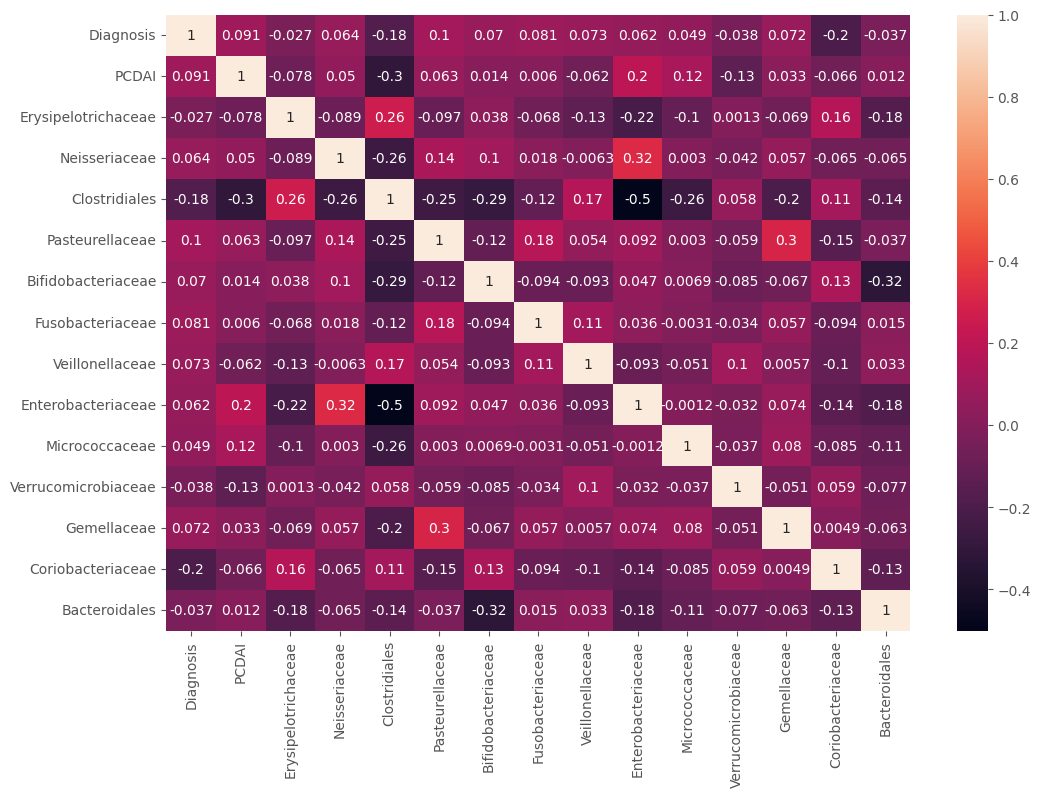

In [98]:
plt.figure(figsize= (12,8))
sns.heatmap(df1[numerical_columns].corr(),annot=True)
plt.show()


Upon examining the correlation matrix, it appears that most variables do not exhibit a significant correlation. However, we did observe a notable correlation between the variables "Clostridiales" and "Enterobacteriaceae," with a coefficient of -0.5.

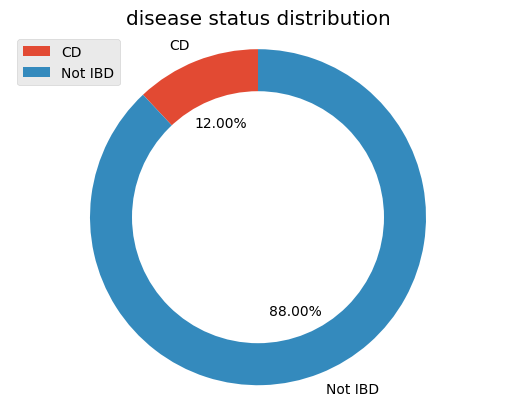

In [99]:

labels = ['CD', 'Not IBD' ]
count = [np.round(df1['Diagnosis'].value_counts()[0]/df1.shape[0],2), np.round(df1['Diagnosis'].value_counts()[1]/df1.shape[0],2)]
plt.style.use('ggplot')
plt.title('disease status distribution')
plt.pie(x=count, labels=labels, autopct='%.2f%%',
         startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(loc='upper left')

# donut
circle = plt.Circle(xy=(0,0), radius=.75, facecolor='white')
plt.gca().add_artist(circle)
plt.show()

# Encoding Categorical variables

In [100]:
df1['race'].unique()

array(['caucasian', 'african', 'other'], dtype=object)

In [101]:
df1['AB_exposure'].unique()

array(['NoAB', 'YesAB'], dtype=object)

In [102]:
df1['AB_exposure'] = df1['AB_exposure'].map({'NoAB': 0, 'YesAB':1})
df1['race'] = df1['race'].map({'caucasian': 0, 'african':1, 'other': 2})

In [103]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 255 entries, 0 to 254
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AB_exposure          255 non-null    int64  
 1   Diagnosis            255 non-null    int64  
 2   race                 255 non-null    int64  
 3   PCDAI                255 non-null    float64
 4   Erysipelotrichaceae  255 non-null    float64
 5   Neisseriaceae        255 non-null    float64
 6   Clostridiales        255 non-null    float64
 7   Pasteurellaceae      255 non-null    float64
 8   Bifidobacteriaceae   255 non-null    float64
 9   Fusobacteriaceae     255 non-null    float64
 10  Veillonellaceae      255 non-null    float64
 11  Enterobacteriaceae   255 non-null    float64
 12  Micrococcaceae       255 non-null    float64
 13  Verrucomicrobiaceae  255 non-null    float64
 14  Gemellaceae          255 non-null    float64
 15  Coriobacteriaceae    255 non-null    flo

# Modelling

In [104]:
from sklearn.model_selection import (train_test_split, cross_val_score, cross_validate,GridSearchCV )
# Train/test split :
X = df1.drop('Diagnosis', axis=1)
y = df1['Diagnosis']
data_train, data_test, target_train, target_test = train_test_split(
    X, y, random_state=101
)

print(
    f"The training dataset contains {data_train.shape[0]} samples and "
    f"{data_train.shape[1]} features"
)
print(
    f"The testing dataset contains {data_test.shape[0]} samples and "
    f"{data_test.shape[1]} features"
)

The training dataset contains 191 samples and 16 features
The testing dataset contains 64 samples and 16 features


In [105]:
from sklearn.metrics import (confusion_matrix, accuracy_score,
                             f1_score, roc_auc_score, precision_score,
                             recall_score, roc_curve, brier_score_loss,
                             precision_recall_curve, log_loss)
from plotly.subplots import make_subplots


In [106]:
my_colors_code = ['#018571', '#80cdc1', '#dfc27d', '#a6611a']
COLOR_PALETTE = {
    "primary": "#018571",
    "secondary": '#80cdc1',
    "muted": "#a6611a"
}

In [107]:
import plotly.express as px
import plotly.graph_objects as go

def plot_confusion_matrix(conf_matrix, xlabels=None, ylabels=None):
    dict_fig_props = {
        "xaxis": {"title": "Predicted"},
        "yaxis": {"title": "Real"}
    }

    # params
    z = conf_matrix
    x = xlabels or ["0", "1"]
    y = ylabels or ["0", "1"]
    z_text = [[str(y) for y in x] for x in z]

    # add annotations
    annotations = []

    for n, row in enumerate(z):
        for m, val in enumerate(row):
            annotation_obj = {
                'x': n, 'y': m,
                'text': str(val),
                'yshift': 10,
                'showarrow': False,
            }

            annotations.append(annotation_obj)

    # set up figure
    dict_fig_props["traces"] = [
        go.Heatmap(
            z=z, x=x, y=y,
            text=z_text,
            colorscale=my_colors_code,
            showscale=False
        )
    ]

    # add_annotations
    dict_fig_props['annotations'] = annotations

    return dict_fig_props


def plot_classification_summary(**kwargs):
    dict_fig_props = {
        "xaxis": {},
        "yaxis": {}
    }

    metric_name = list(kwargs.keys())
    metric_score = list(kwargs.values())

    dict_fig_props["traces"] = [
        go.Table(
            header={'values': ["Metric", "Score"], 'line_color':my_colors_code[-1], 'fill_color' : my_colors_code[0]},
            cells={'values': [metric_name, metric_score], 'line_color':my_colors_code[-1],
            'fill': dict(color=[my_colors_code[1], my_colors_code[2]])}
        )
    ]

    # add_annotations
    dict_fig_props['annotations'] = None

    return dict_fig_props


def plot_ROC_curve(fpr, tpr, thresholds):
    dict_fig_props = {
        "xaxis": {"title": "false positive rate"},
        "yaxis": {"title": "true positive rate"}
    }

    dict_fig_props["traces"] = [
        go.Scatter(y=tpr.round(3), x=fpr.round(3),
                   text=thresholds.round(3),
                   mode="lines", showlegend=False,
                   fill='tozeroy', name="ROC curve",
                   line_color=COLOR_PALETTE["primary"]),
        go.Scatter(y=tpr, x=tpr,
                   mode="lines", showlegend=False,
                   name="Base line",
                   line_color=COLOR_PALETTE["muted"],
                   line_dash="dot")
    ]

    # add_annotations
    dict_fig_props['annotations'] = None

    return dict_fig_props


def plot_precision_recall_curve(precision, recall, thresholds):
    dict_fig_props = {
        "xaxis": {"title": "recall"},
        "yaxis": {"title": "precision"}
    }

    dict_fig_props["traces"] = [
        go.Scatter(y=precision.round(3), x=recall.round(3),
                   text=thresholds.round(3),
                   mode="lines", showlegend=False,
                   name="precision recall curve",
                   line_color=COLOR_PALETTE["primary"]),
    ]

    # add_annotations
    dict_fig_props['annotations'] = None

    return dict_fig_props

In [108]:
def generate_classification_report(model, X_test, y_test, model_name="Hello world") -> None:
    # data to plot
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    y_pred = model.predict(X_test)

    # confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # summary table
    summary_scores = {
        name: score_func(y_test, y_pred, y_pred_proba).round(3)
        for name, score_func in {
            'accuray': lambda x, y, z: accuracy_score(x, y),
            'precision': lambda x, y, z: precision_score(x, y),
            'recall': lambda x, y, z: recall_score(x, y),
            'f1 score': lambda x, y, z: f1_score(x, y),
            '<b>area under the roc</b>' : lambda x, y, z: roc_auc_score(x, z),
            '<b>brier score loss</b>' : lambda x, y, z: brier_score_loss(x, y)
        }.items()
    }

    # roc curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    auc_score = roc_auc_score(y_test, y_pred_proba)
    auc_score = auc_score.round(3)

    # precision recall curve
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)


    # init fig
    fig = make_subplots(rows=2, cols=2,
                        subplot_titles=("Confusion matix", "Classification metrics",
                                        f"ROC curve (AUC={auc_score})",
                                        "Precision - Recall curve"),
                        specs=[[{}, {"type": "table"}],
                               [{}, {}]],
                        horizontal_spacing=0.07,
                        vertical_spacing=0.2
                        )

    # build and assign plots
    arr_plots = [
                {
            "plot_props": plot_confusion_matrix(conf_matrix),
            "row": 1, "col": 1
        },
        {
            "plot_props": plot_classification_summary(**summary_scores),
            "row": 1, "col": 2
        },
        {
            "plot_props": plot_ROC_curve(fpr, tpr, thresholds),
            "row": 2, "col": 1
        },
        {
            "plot_props": plot_precision_recall_curve(precision,
                                                  recall, thresholds),
            "row": 2, "col": 2
        },
    ]

    # make plot
    for plot in arr_plots:
        # explode params
        plot_props = plot["plot_props"]
        row = plot["row"]
        col = plot["col"]

        # plot
        fig.add_traces(
            plot_props["traces"],
            rows=row, cols=col
        )

        # add annotations
        if plot_props["annotations"]:
            for annotation in plot_props["annotations"]:
                fig.add_annotation(**annotation,
                                   row=row, col=col)

        # update axisi
        fig.update_xaxes(**plot_props["xaxis"], row=row, col=col)
        fig.update_yaxes(**plot_props["yaxis"], row=row, col=col)


    # global layout
    fig.update_layout(
        title=f"Global report for: {model_name}",
        # annotations=plot_confusion_matrix(conf_matrix)['annotations'],
        height=800,
    )

    fig.show()
    return summary_scores

# Logistic Regression Model :

In [109]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs')
model.fit(data_train, target_train)

LogisticRegression()

In [110]:
# Prediction on the test set :
target_predicted = model.predict(data_test)

In [111]:
print(
    f"The test accuracy using a {model.__class__.__name__} is "
    f"{model.score(data_test, target_test):.3f}"
)

The test accuracy using a LogisticRegression is 0.922


In [112]:
scores_lr_bs = generate_classification_report(model, data_test, target_test, "Baseline Model")

# Random Forest

In [113]:
def evaluate(model, X, y, cv):
    # Cross Validation :
    cv_results = cross_validate(
        model,
        X,
        y,
        cv=cv,
        scoring=["neg_brier_score", "roc_auc"],
    )
    # Calculate scores :
    brier_sc = -cv_results["test_neg_brier_score"] # we add - since it's negative
    roc_sc = cv_results["test_roc_auc"]
    print(
        f"Brier Loss Score :     {brier_sc.mean():.3f} +/- {brier_sc.std():.3f}\n"
        f"ROC_AUC Score : {roc_sc.mean():.3f} +/- {roc_sc.std():.3f}"
    )

In [114]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import  HalvingGridSearchCV
# Grid Search
param_grid = {'max_depth': [3, 5, 10],
               'min_samples_split': [2, 5, 10]
}


base_estimator = RandomForestClassifier(random_state=0)
# HalvingGridSearchCV to use minimum resources :
sh = HalvingGridSearchCV(base_estimator, param_grid, cv=5,
                         factor=2, resource='n_estimators',
                         max_resources=30).fit(data_train, target_train)
sh.best_estimator_

RandomForestClassifier(max_depth=3, n_estimators=24, random_state=0)

In [115]:
import time

start = time.time()
rf_model = sh.best_estimator_
rf_model.fit(data_train, target_train)
elapsed_time_2 = time.time() - start

print(
    f"The model {rf_model.__class__.__name__} was trained in "
    f"{elapsed_time_2:.3f} seconds"
)

evaluate(rf_model, data_train, target_train, cv=5)
scores_rf = generate_classification_report(rf_model, data_test, target_test, "RandomForest")

The model RandomForestClassifier was trained in 0.053 seconds
Brier Loss Score :     0.112 +/- 0.007
ROC_AUC Score : 0.692 +/- 0.107


#  DecisionTreeClassifier

In [116]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

start = time.time()
tree_model = DecisionTreeClassifier()
tree_model.fit(data_train, target_train)
elapsed_time_2 = time.time() - start

print(
    f"The model {tree_model.__class__.__name__} was trained in "
    f"{elapsed_time_2:.3f} seconds"
)

evaluate(tree_model, data_train, target_train, cv=5)
scores_tree = generate_classification_report(tree_model, data_test, target_test, "RandomForest")

The model DecisionTreeClassifier was trained in 0.004 seconds
Brier Loss Score :     0.199 +/- 0.038
ROC_AUC Score : 0.562 +/- 0.102


# Bagging Classifier :

In [117]:
from sklearn.ensemble import BaggingClassifier
start = time.time()
bg_model = BaggingClassifier(base_estimator=rf_model,max_samples=0.5,max_features=1.0,n_estimators=2)
bg_model.fit(data_train, target_train)
elapsed_time_2 = time.time() - start

print(
    f"The model {bg_model.__class__.__name__} was trained in "
    f"{elapsed_time_2:.3f} seconds"
)

evaluate(bg_model, data_train, target_train, cv=5)
scores_bg = generate_classification_report(bg_model, data_test , target_test, "Bagging Classifier")

The model BaggingClassifier was trained in 0.098 seconds
Brier Loss Score :     0.118 +/- 0.013
ROC_AUC Score : 0.623 +/- 0.102


# Adaboost :

In [118]:
from sklearn.ensemble import  AdaBoostClassifier
import warnings
warnings.filterwarnings("ignore")
start = time.time()
ada_model = AdaBoostClassifier(base_estimator=rf_model, n_estimators=3)
ada_model.fit(data_train, target_train)
elapsed_time_2 = time.time() - start

print(
    f"The model {ada_model.__class__.__name__} was trained in "
    f"{elapsed_time_2:.3f} seconds"
)

evaluate(ada_model, data_train, target_train, cv=5)
scores_ada = generate_classification_report(ada_model, data_test , target_test, "AdaBoost Classifier")

The model AdaBoostClassifier was trained in 0.142 seconds
Brier Loss Score :     0.116 +/- 0.010
ROC_AUC Score : 0.750 +/- 0.086


# XGBoost Classifier :

In [119]:
from xgboost import XGBClassifier

start = time.time()

XGB_model = XGBClassifier(random_state=101,  booster='gbtree', min_child_weight= 23, max_depth= 6)
XGB_model.fit(data_train, target_train)
elapsed_time_2 = time.time() - start

print(
    f"The model {XGB_model.__class__.__name__} was trained in "
    f"{elapsed_time_2:.3f} seconds"
)

evaluate(XGB_model, data_train, target_train, cv=5)
scores_xgb = generate_classification_report(XGB_model, data_test, target_test, "XGBoost Classifier")

The model XGBClassifier was trained in 0.041 seconds
Brier Loss Score :     0.119 +/- 0.006
ROC_AUC Score : 0.500 +/- 0.000


# LBGM_model

In [120]:
from lightgbm import LGBMClassifier

start = time.time()
LBGM_model = LGBMClassifier(boosting_type='gbdt', n_estimators=100, learning_rate=0.288, num_leaves= 720, max_depth= 4)
LBGM_model.fit(data_train, target_train)
elapsed_time_2 = time.time() - start

print(
    f"The model {LBGM_model.__class__.__name__} was trained in "
    f"{elapsed_time_2:.3f} seconds"
)

evaluate(LBGM_model, data_train, target_train, cv=5)
scores_lgbm = generate_classification_report(LBGM_model, data_test , target_test, "LGBM Classifier")

The model LGBMClassifier was trained in 0.034 seconds
Brier Loss Score :     0.124 +/- 0.011
ROC_AUC Score : 0.737 +/- 0.055


# VotingClassifier :

In [121]:
from sklearn.ensemble import  VotingClassifier
start = time.time()
vote_model=VotingClassifier(estimators=[('xgb',XGB_model),('lgbm',LBGM_model),('adab',ada_model),('rf',rf_model)],voting='soft')
vote_model.fit(data_train, target_train)
elapsed_time_2 = time.time() - start

print(
    f"The model {vote_model.__class__.__name__} was trained in "
    f"{elapsed_time_2:.3f} seconds"
)

evaluate(vote_model, data_train, target_train, cv=5)
scores_vote = generate_classification_report(vote_model, data_test , target_test, " Voting Classifier")

The model VotingClassifier was trained in 0.335 seconds
Brier Loss Score :     0.105 +/- 0.008
ROC_AUC Score : 0.723 +/- 0.065


**`About Voting Classifier :`**
- The motivation behidn using this ensemble learning model is to benefit from the good performances of the models above but also not be biased or overfitting.
- the results still good.

# Results :

In [122]:
scores_list = [scores_lr_bs, scores_tree, scores_rf, scores_bg, scores_ada, scores_xgb, scores_lgbm, scores_vote]
model_list = [  'LogisticRegression',  'DecisionTreeClassifier',
                'RandomForestClassifier', 'BaggingClassifier', 'AdaBoostClassifier',
                'XGBClassifier', 'LGBMClassifier', 'VotingClassifier']

In [123]:
df_results = pd.DataFrame(columns=['model', 'accuray', 'precision', 'recall', 'f1 score', '<b>area under the roc</b>', '<b>brier score loss</b>'])

df_results['model'] =  model_list
for c in df_results.columns :
    if c != 'model':
        df_results[c] = [ score[c] for score in scores_list]

df_results = df_results.rename(columns={'accuray':'accuracy'})

In [124]:
import plotly.figure_factory as ff
import plotly.offline as py


table  = ff.create_table(np.round(df_results,4),colorscale=[[0, '#018571'],[.5, '#ffffff'],[1, '#ffffff']],
                        font_colors=['#ffffff', '#000000', '#000000'])

py.iplot(table)

Based on the provided results, it appears that several models have achieved similar accuracy, precision, recall, and F1 score values. However, when considering the additional metrics of area under the ROC curve and Brier score loss, the Random Forest Classifier stands out as the most favorable choice.

The Random Forest Classifier achieves an accuracy of 0.922, which is on par with the other models in the list. It also demonstrates high precision and recall scores of 0.922 and 1.000, respectively, indicating that it can effectively identify positive instances without many false positives. The F1 score, which combines precision and recall, is 0.959, highlighting a balanced performance between precision and recall.

What sets the Random Forest Classifier apart is its superior area under the ROC curve of 0.776. The ROC curve represents the trade-off between true positive rate and false positive rate, and a higher area under the curve suggests a better ability to distinguish between positive and negative instances.

Additionally, the Brier score loss of 0.078 for the Random Forest Classifier is the lowest among the listed models. The Brier score measures the accuracy of probabilistic predictions, with lower values indicating better calibration and accuracy.

# Feature Importance

#### pip install shap

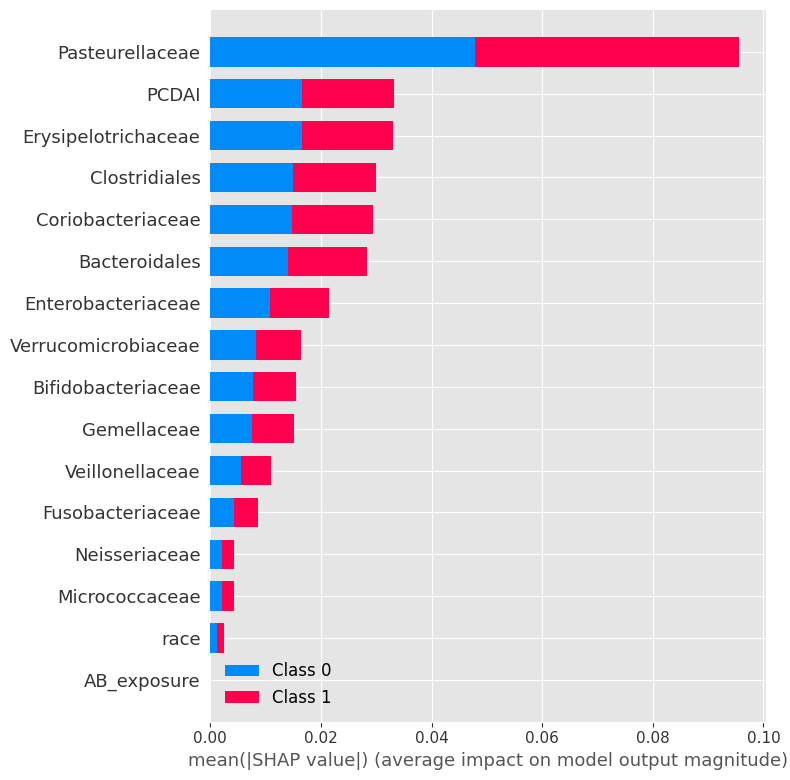

In [125]:
import shap
column_names = data_train.columns
X_train_array = data_train.values
model = RandomForestClassifier(max_depth=3, n_estimators=24, random_state=0)
model.fit(X_train_array, target_train)

# Calculate SHAP values for all features
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train_array)

# Create a summary plot
shap.summary_plot(shap_values, X_train_array, feature_names=column_names, plot_type='bar', show=False)

# Display the plot
plt.show()

The feature importance plot based on SHAP values for the Random Forest Classifier provides valuable insights into the relative importance of different features in predicting the target variable. The plot displays a bar chart where each vertical bar corresponds to a specific feature. The length and color of the bars represent the magnitude and direction of the feature's impact on the model's output. By examining the plot, we can identify the most influential features in our model. Features with longer bars indicate a higher importance, as they have a stronger impact on the predictions. Conversely, features with shorter bars have relatively less influence.

In our case we can observe that certain features have a significant influence and impact on the model predictions. Notably, the features 'Pasteurellaceae', 'PCDAI', 'Erysipelotrichaceae', and 'Clostridiales' exhibit longer bars, indicating their high importance in the model's decision-making process. These features contribute significantly to the accuracy and predictive power of the model. On the other hand, features such as 'race', 'Micrococcaceae', and 'Neisseriaceae' display relatively shorter bars, suggesting their limited impact on the model's predictions.

# Random Forest after applying feature selection

In [126]:
selected_columns = ['Pasteurellaceae', 'PCDAI', 'Erysipelotrichaceae', 'Clostridiales' , 'Coriobacteriaceae','Bacteroidales', 'Enterobacteriaceae','Verrucomicrobiaceae','Bifidobacteriaceae']


In [127]:
start = time.time()
rf_model = sh.best_estimator_
rf_model.fit(data_train[selected_columns], target_train)
elapsed_time_2 = time.time() - start

print(
    f"The model {rf_model.__class__.__name__} was trained in "
    f"{elapsed_time_2:.3f} seconds"
)

evaluate(rf_model, data_train, target_train, cv=5)
scores_rfa = generate_classification_report(rf_model, data_test[selected_columns], target_test, "RandomForest")

The model RandomForestClassifier was trained in 0.053 seconds
Brier Loss Score :     0.112 +/- 0.007
ROC_AUC Score : 0.692 +/- 0.107


# Comparison of Random Forest Model Before and After Feature Selection

In this analysis, we will compare the performance of the Random Forest model before and after performing feature selection. The Random Forest model is initially trained using all available features. Then, feature selection techniques are applied to identify the most important features.

Before feature selection, the Random Forest model is trained on the entire set of features. This allows the model to consider the collective information from all available predictors. However, it can lead to potential issues such as overfitting or including irrelevant features that may not contribute significantly to the model's performance.

Then we apply Shap values to select the most important features. This process will help to reduce the dimensionality of the feature space, focusing only on the most informative predictors. By eliminating irrelevant or redundant features, we aim to improve the model's performance and interpretability.

In [131]:
scores_list = [ scores_rf, scores_rfa ]
model_list = [  'RF before FS', 'RF after FS' ]

In [132]:
df_results = pd.DataFrame(columns=['model', 'accuray', 'precision', 'recall', 'f1 score', '<b>area under the roc</b>', '<b>brier score loss</b>'])

df_results['model'] =  model_list
for c in df_results.columns :
    if c != 'model':
        df_results[c] = [ score[c] for score in scores_list]

df_results = df_results.rename(columns={'accuray':'accuracy'})

In [133]:
import plotly.figure_factory as ff
import plotly.offline as py


table  = ff.create_table(np.round(df_results,4),colorscale=[[0, '#018571'],[.5, '#ffffff'],[1, '#ffffff']],
                        font_colors=['#ffffff', '#000000', '#000000'])

py.iplot(table)

#C/c:
After comparing the Random Forest model before and after feature selection, we found minimal changes in accuracy, precision, recall, and F1 score. The area under the ROC curve slightly decreased after feature selection, while the Brier score loss remained unchanged. Feature selection had limited impact on model performance, indicating that the initial model with all features performed comparably to the selected subset of features.

However if we are working on large data and have found the same result like this random forest after feature selection would be preferable. This is because feature selection helps reduce computational time and dimensionality, making the model more efficient and manageable without significantly impacting its performance.